In [918]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from skimpy import skim

### Chargement, Visualisation et Analyse Exploratoire des Données (EDA) :

In [919]:
# Chargement et affichage des 5 premières lignes du dataset
df = pd.read_csv(r'data_set\train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [920]:
# On copie le dataset pour éviter de modifier l'original
df_copy = df.copy()

In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [922]:
# Suppression de la colonne 'Loan_ID'
df.drop('Loan_ID', axis=1, inplace=True)

### Statistiques descriptive

In [923]:
# Verification des valeures manquantes et statistiques descriptives avancées
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ApplicantIncome       │   0 │     0 │     5403 │     6109 │  150 │  2878 │  3812 │  5795 │  81000 │   ▇    │  │
│ │ CoapplicantIncome     │   0 │     0 │     1621 │     2926 │    0 │     0 │  1188 │  2297 │  41670 │   ▇    │  │
│ │ LoanAmount            │  22 │  3.58 │    146.4 │    85.59 │    9 │   100 │   128 │   168 │    700 │  ▇▇▁   │  │
│ │ Loan_Amount_Term      │  14 │  2.28 │      342 │    65.12 │   12 │   360 │   360 │   360 │    480 │   ▁ ▇  │  │
│ │ Credit_History        │  50 │  8.14 │   0.8422 │   0.3649 │    0 │     1 │     1 │     1 │      1 │ ▁    ▇ │  │
│ └───────────────────────┴─────┴───────┴──────────┴──────────┴──────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [924]:
# On assigne les colonnes dans les variables catégorielles et numériques
features_cat = df.select_dtypes(include='object').columns
features_num = df.select_dtypes(include=['int64', 'float64']).columns

In [925]:
features_cat_2 = features_cat.drop('Loan_Status')

In [926]:
print(features_cat)
print(features_num)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


### Gestion des valeures NULL 

In [927]:
# On remplace les valeurs manquantes de la variable categorielles par le mode
for value in features_cat:
    df[value] =df[value].fillna(df[value].mode()[0])

In [928]:
# On remplace les valeurs manquantes de la variable numériques par la médiane
for value in features_num:
    df[value] =df[value].fillna(df[value].median())

In [929]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ApplicantIncome       │   0 │     0 │    5403 │    6109 │  150 │   2878 │  3812 │   5795 │  81000 │   ▇    │  │
│ │ CoapplicantIncome     │   0 │     0 │    1621 │    2926 │    0 │      0 │  1188 │   2297 │  41670 │   ▇    │  │
│ │ LoanAmount            │   0 │     0 │   145.8 │   84.11 │    9 │  100.2 │   128 │  164.8 │    700 │  ▇▇▁   │  │
│ │ Loan_Amount_Term      │   0 │     0 │   342.4 │   64.43 │   12 │    360 │   360 │    360 │    480 │   ▁ ▇  │  │
│ │ Credit_History        │   0 │     0 │   0.855 │  0.3523 │    0 │      1 │     1 │      1 │      1 │ ▁    ▇ │  │
│ └───────────────────────┴─────┴───────┴─────────┴─────────┴──────┴────────┴───────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                       │      0 │          0 │                           1 │                     614 │  │
│ │ Married                      │      0 │          0 │                           1 │                     614 │  │
│ │ Dependents                   │      0 │          0 │                           1 │                     614 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │      0 │          0 │                           1 │                     614 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Analyse univariée

### Gestion des variables catégorielles

In [930]:
# Remplacement des valeurs de la variable cible par des valeurs plus explicites (accordé, refusé) avec np.where et np.select 
conditions = [
    df['Loan_Status'].isin(['Y', 'N'])
]
values = [
    np.where(df['Loan_Status'] == 'Y', 'Accepté', 'Rejeté')
]

# np.where pour remplacer les valeurs
df['Loan_Status'] = np.select(conditions, values, default='inconnu')

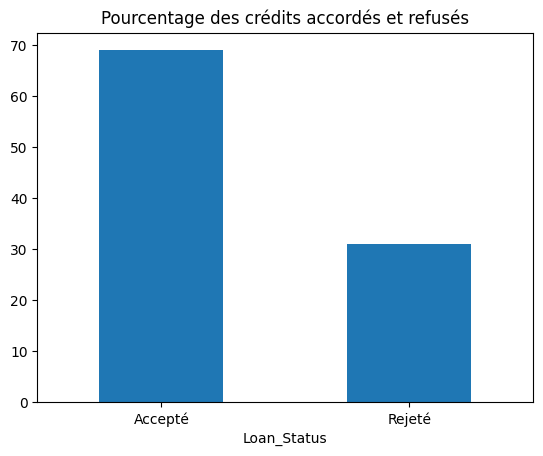

In [931]:
# Pourcentage des crédits accordés et refusés
loan_status = round(df['Loan_Status'].value_counts(normalize=True) * 100, 0).plot(kind='bar', title='Pourcentage des crédits accordés et refusés', rot=0)

In [932]:
# On affiche le nombre de demandes de prêt pour chaque catégorie de chaque colonne catégorielle
for col in features_cat:
    value_counts = df[col].value_counts()
    value_counts_2 = df[col].value_counts(normalize=True) * 100
    for value, count in value_counts.items():
        percentage = round(value_counts_2[value])
        print(f"Il y a {count} demandes de prêt pour les {value} dans la colonne {col} soit {percentage}% de demande traitée")
        

Il y a 502 demandes de prêt pour les Male dans la colonne Gender soit 82% de demande traitée
Il y a 112 demandes de prêt pour les Female dans la colonne Gender soit 18% de demande traitée
Il y a 401 demandes de prêt pour les Yes dans la colonne Married soit 65% de demande traitée
Il y a 213 demandes de prêt pour les No dans la colonne Married soit 35% de demande traitée
Il y a 360 demandes de prêt pour les 0 dans la colonne Dependents soit 59% de demande traitée
Il y a 102 demandes de prêt pour les 1 dans la colonne Dependents soit 17% de demande traitée
Il y a 101 demandes de prêt pour les 2 dans la colonne Dependents soit 16% de demande traitée
Il y a 51 demandes de prêt pour les 3+ dans la colonne Dependents soit 8% de demande traitée
Il y a 480 demandes de prêt pour les Graduate dans la colonne Education soit 78% de demande traitée
Il y a 134 demandes de prêt pour les Not Graduate dans la colonne Education soit 22% de demande traitée
Il y a 532 demandes de prêt pour les No dans la 

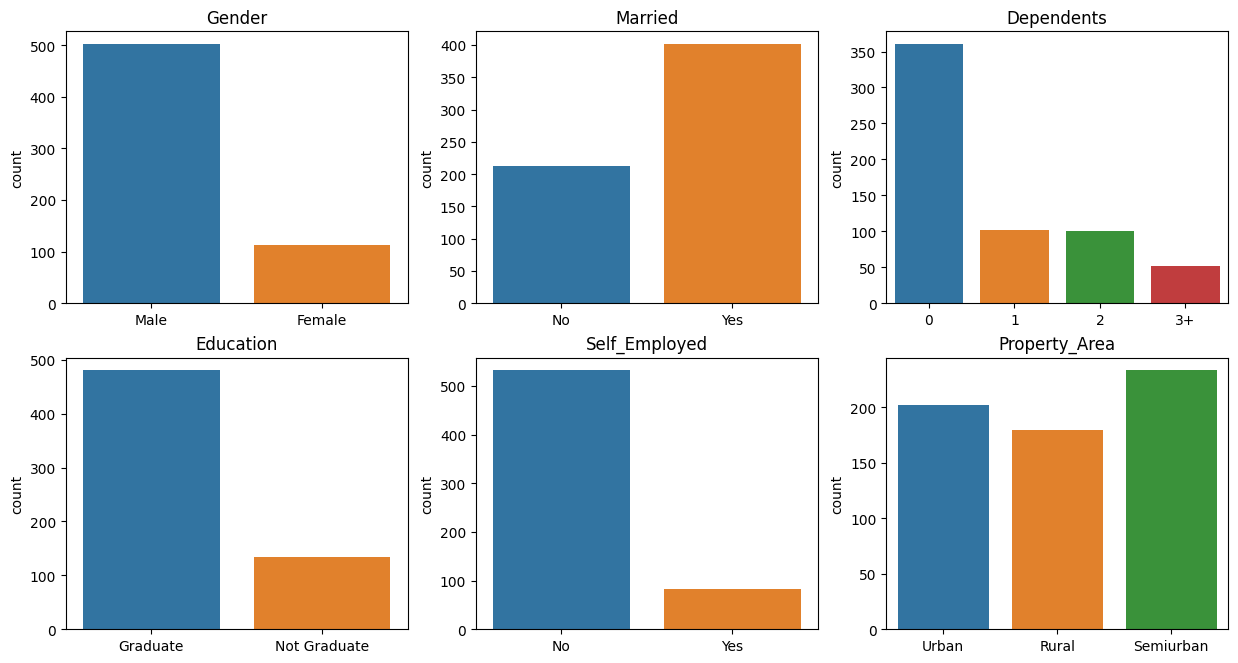

In [933]:
# On affiche le nombre de demandes de prêt pour chaque catégorie de chaque colonne catégorielle
plt.figure(figsize=(15, 12))
for i, col in enumerate(features_cat_2, 1): 
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], hue=df[col])
    plt.title(col)
    plt.xlabel('')

## Analyse bivariée et multivariée

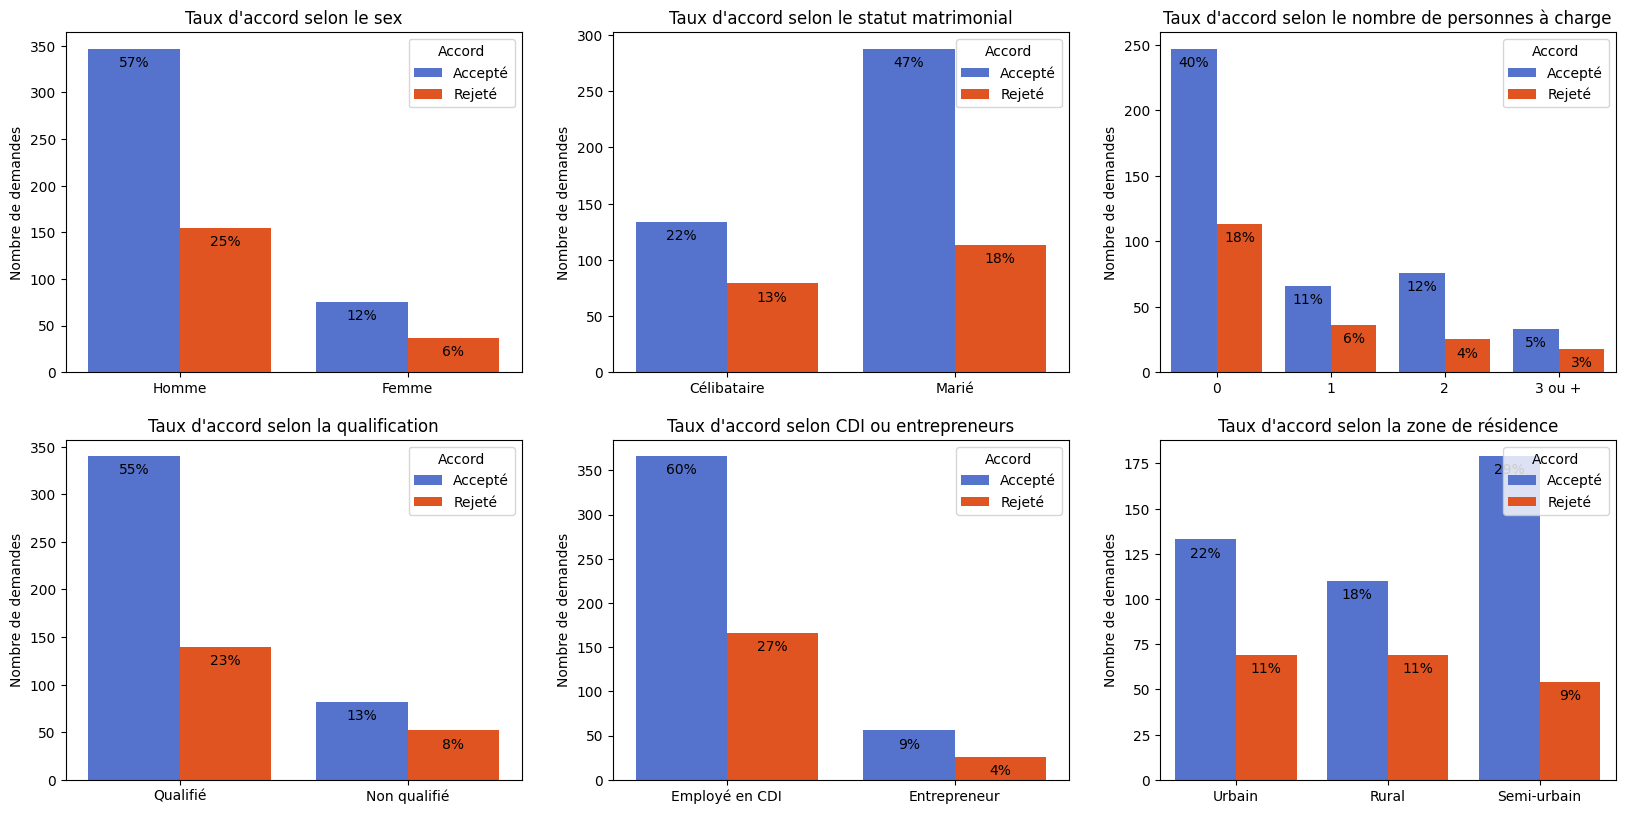

In [934]:
# On affiche la distribution et le pourcentage des refus et des accords de prêt pour chaque catégorie de chaque colonne catégorielle
palette = ['royalblue', 'orangered']

title_feat = {
    'Gender': 'le sex', 
    'Married': 'le statut matrimonial',
    'Dependents': 'le nombre de personnes à charge',
    'Education': 'la qualification',
    'Self_Employed': 'CDI ou entrepreneurs',
    'Property_Area': 'la zone de résidence',
    'Loan_Status': 'Statut du prêt'
}
df['Married'] = df['Married'].replace('Yes','Y')
df['Married'] = df['Married'].replace('No','N')

sub_title = {'Male': 'Homme', 'Female': 'Femme', 
             'Y': 'Marié', 'N': 'Célibataire', 
             '0': '0', '1': '1', '2': '2', '3+': '3 ou +', 
             'Graduate': 'Qualifié', 'Not Graduate': 'Non qualifié', 
             'Yes': 'Entrepreneur', 'No': 'Employé en CDI', 
             'Urban': 'Urbain', 'Semiurban': 'Semi-urbain', 'Rural': 'Rural'}

for col in features_cat:
    for value in df[col]:
        if value in sub_title.keys():
            df[col] = df[col].replace(value, sub_title[value])
    
    
# Créer la figure principale
plt.figure(figsize=(20, 15))

# Boucle pour créer les subplots
for i, col in enumerate(features_cat_2, 1): 
    plt.subplot(3, 3, i)
    ax = sns.countplot(x=df[col], hue=df['Loan_Status'], palette=palette)
    
    # Ajouter les annotations de pourcentage
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        if percentage >= 2:  
            ax.annotate(f'{percentage:.0f}%', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', 
                        xytext=(0, -15), fontsize=10,
                        textcoords='offset points')
    
    plt.ylabel('Nombre de demandes')
    plt.xlabel('')
    plt.legend(loc='upper right', title='Accord')
    plt.title(f"Taux d\'accord selon {title_feat[col]}")

plt.show()

In [935]:
# Calculer la différence entre les taux d'accord et de refus pour chaque catégorie
for col in features_cat_2:
    cross = pd.crosstab(df[col], df['Loan_Status'], normalize='index')
    cross['Difference'] = cross['Accepté'] - cross['Rejeté']
    print(cross)
    print('\n')

Loan_Status   Accepté    Rejeté  Difference
Gender                                     
Femme        0.669643  0.330357    0.339286
Homme        0.691235  0.308765    0.382470


Loan_Status   Accepté    Rejeté  Difference
Married                                    
Célibataire  0.629108  0.370892    0.258216
Marié        0.718204  0.281796    0.436409


Loan_Status   Accepté    Rejeté  Difference
Dependents                                 
0            0.686111  0.313889    0.372222
1            0.647059  0.352941    0.294118
2            0.752475  0.247525    0.504950
3 ou +       0.647059  0.352941    0.294118


Loan_Status    Accepté    Rejeté  Difference
Education                                   
Non qualifié  0.611940  0.388060    0.223881
Qualifié      0.708333  0.291667    0.416667


Loan_Status      Accepté    Rejeté  Difference
Self_Employed                                 
Employé en CDI  0.687970  0.312030    0.375940
Entrepreneur    0.682927  0.317073    0.365854


Loan_S

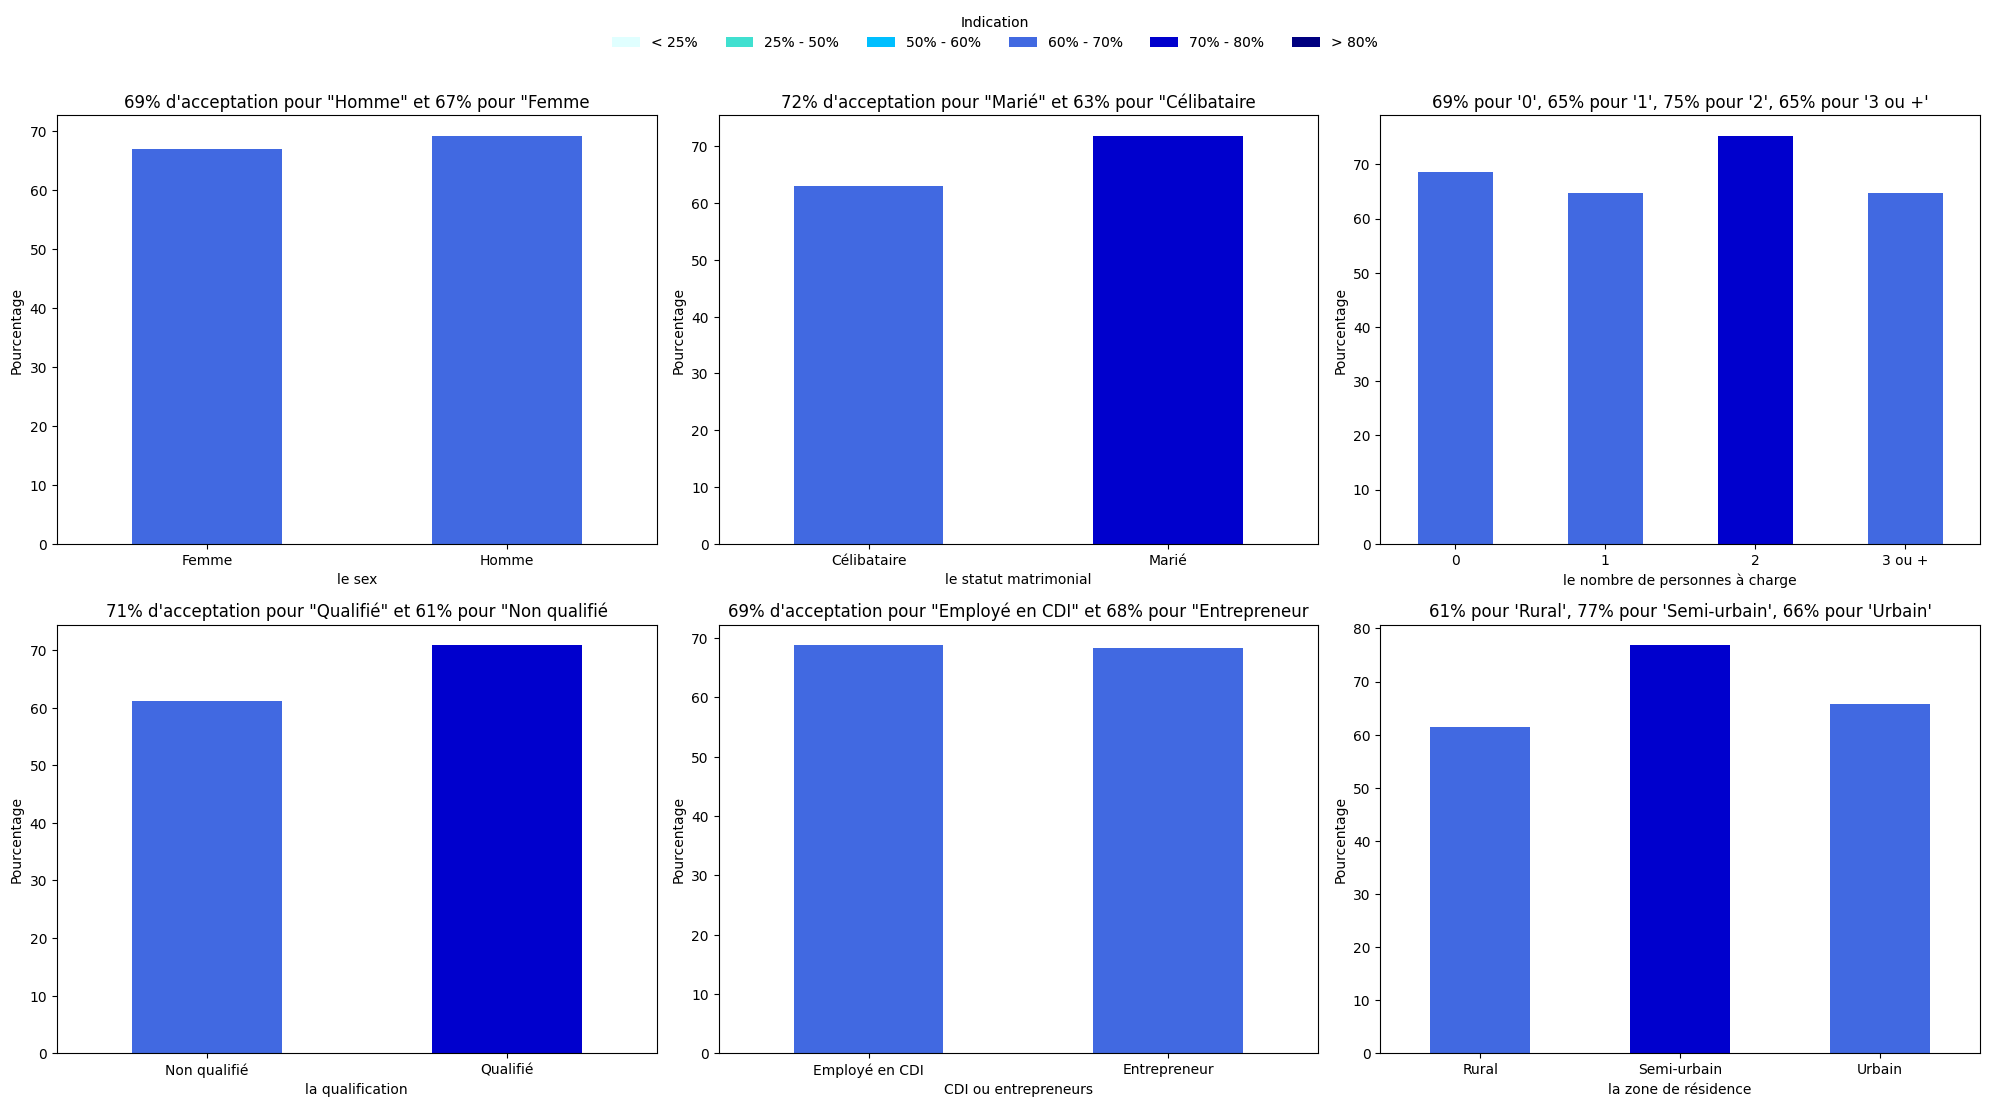

In [936]:
# Fonction pour attribuer une couleur en fonction du pourcentage
def color_palette(val):
    if val < 25:
        return 'lightcyan'
    elif 25 <= val < 50:
        return 'turquoise'
    elif 50 <= val < 60:
        return 'deepskyblue'
    elif 60 <= val < 70:
        return 'royalblue'
    elif 70 <= val < 80:
        return 'mediumblue'
    else:
        return 'navy'

# Définir les patches pour la légende
legend_elements = [
    Patch(facecolor='lightcyan', label='< 25%'),
    Patch(facecolor='turquoise', label='25% - 50%'),
    Patch(facecolor='deepskyblue', label='50% - 60%'),
    Patch(facecolor='royalblue', label='60% - 70%'),
    Patch(facecolor='mediumblue', label='70% - 80%'),
    Patch(facecolor='navy', label='> 80%')
]


for col in features_cat_2:
    for value in df[col]:
        if value in sub_title.keys():
            df[col] = df[col].replace(value, sub_title[value])

# Créer la figure principale
plt.figure(figsize=(20, 15))

# Boucle pour créer les subplots
for i, col in enumerate(features_cat_2, 1):
    plt.subplot(3, 3, i)
    cross = pd.crosstab(df[col], df['Loan_Status'], normalize='index') * 100
    accept_rates = cross['Accepté']

    colors = [color_palette(val) for val in accept_rates]
    accept_rates.plot(kind='bar', color=colors)
    
    # Résumé pour les catégories avec plus de deux valeurs
    if len(cross) > 2:
        summary = ', '.join([f"{val:.0f}% pour '{idx}'" for idx, val in zip(cross.index, accept_rates)])
        plt.title(f'{summary}')
    else:
        max_value = accept_rates.max()
        min_value = accept_rates.min()
        max_index = accept_rates.idxmax()
        min_index = accept_rates.idxmin()
        plt.title(f"""{max_value:.0f}% d\'acceptation pour "{max_index}" et {min_value:.0f}% pour "{min_index}""")
    
    plt.ylabel('Pourcentage')
    plt.xlabel(title_feat[col])
    plt.xticks(rotation=0 if len(cross) > 2 else 0)
    plt.figlegend(handles=legend_elements, loc='upper center', title='Indication', bbox_to_anchor=(0.5, 1.05), ncol=6, edgecolor='none')
    

plt.tight_layout()
plt.show()


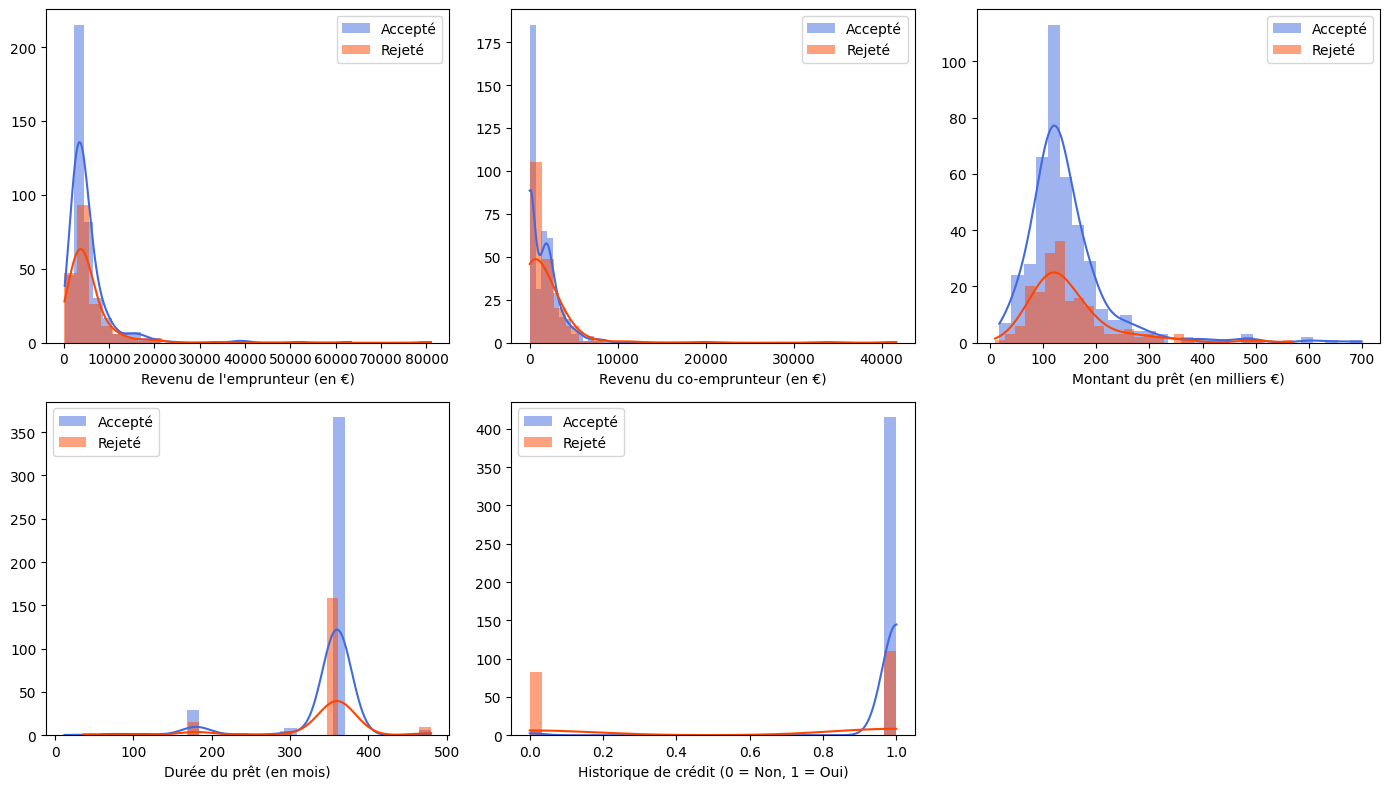

In [937]:
# Comparaison des emprunts accordés et refusés
title_map = {'ApplicantIncome': 'Revenu de l\'emprunteur (en €)', 
                 'CoapplicantIncome': 'Revenu du co-emprunteur (en €)', 
                 'LoanAmount': 'Montant du prêt (en milliers €)', 
                 'Loan_Amount_Term': 'Durée du prêt (en mois)', 
                 'Credit_History': 'Historique de crédit (0 = Non, 1 = Oui)'}

accepted = df[df['Loan_Status'] == 'Accepté']
rejected = df[df['Loan_Status'] == 'Rejeté']

plt.figure(figsize=(14, 8))
for i, col in enumerate(features_num, 1):
    plt.subplot(2, 3, i)
    sns.histplot(accepted[col],  bins=30, edgecolor='none', kde=True, color='royalblue', label='Accepté')
    sns.histplot(rejected[col],  bins=30, edgecolor='none', kde=True, color='orangered', label='Rejeté')
    plt.legend()
    plt.ylabel('')
    plt.xlabel(f'{title_map[col] if col in title_map else col}')
plt.tight_layout()
plt.show()


<Axes: >

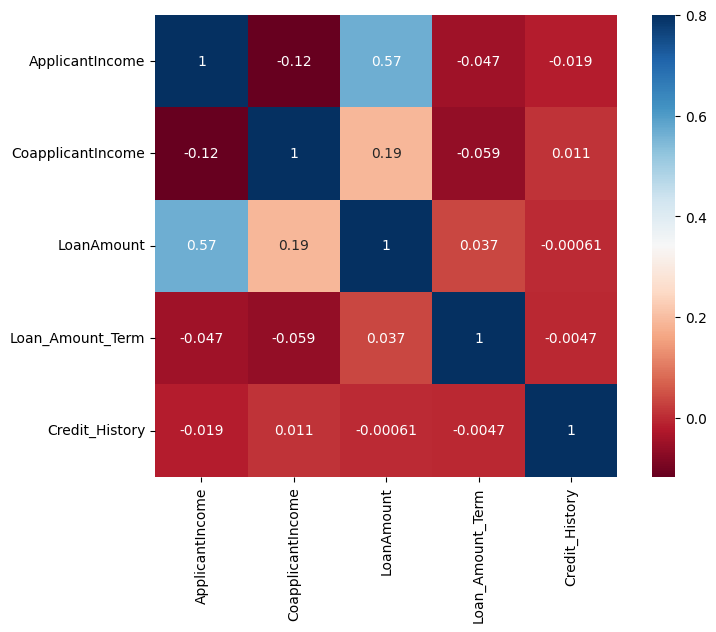

In [938]:
# Visualisation de la matrice de corrélation
matrix = df[features_num].corr()
plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='RdBu', annot=True)

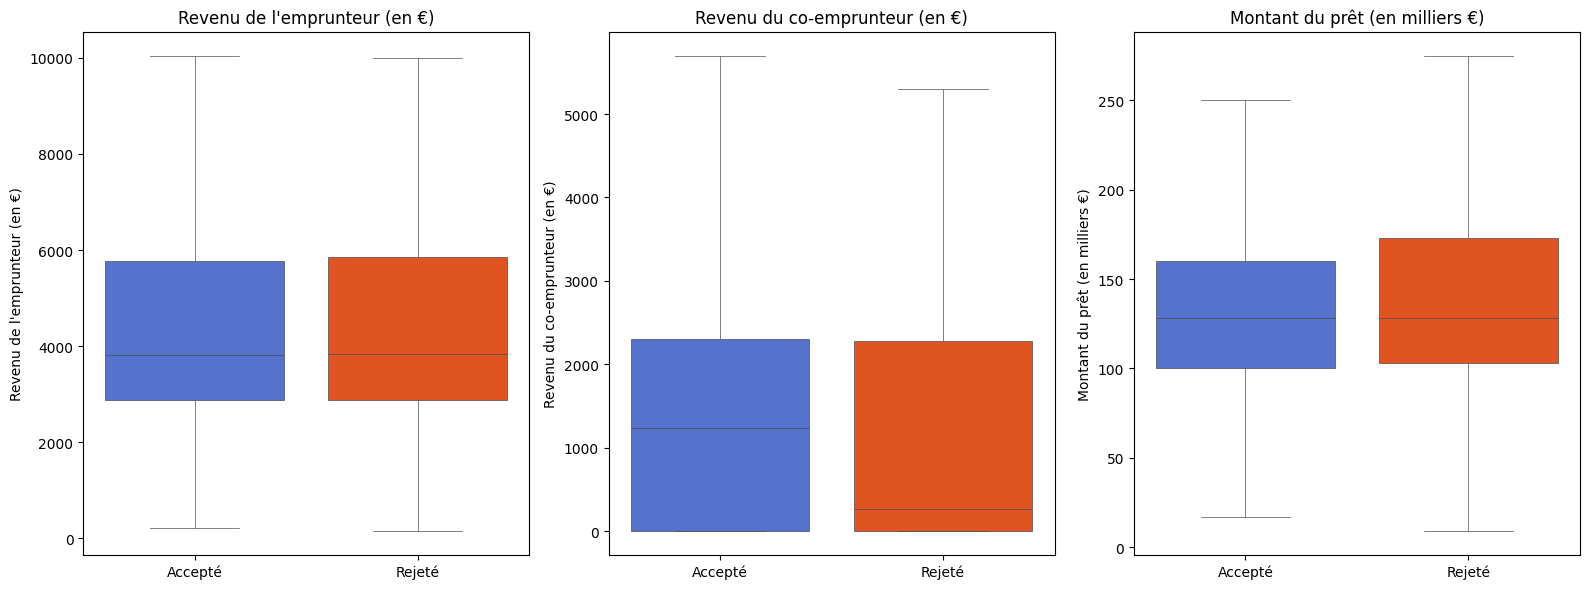

In [939]:
# Visualisation de la distribution des revenus et du montant du prêt par accord de prêt
mapping = {'ApplicantIncome': 'Revenu de l\'emprunteur (en €)', 
                 'CoapplicantIncome': 'Revenu du co-emprunteur (en €)', 
                 'LoanAmount': 'Montant du prêt (en milliers €)'}

plt.figure(figsize=(16, 6))
for i, (col, title) in enumerate(mapping.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Loan_Status', y=col, data=df, hue=df['Loan_Status'], showfliers=False, palette=palette, linewidth=.5)
    plt.title(f'{title}')
    plt.xlabel('')
    plt.ylabel(title)
    plt.tight_layout()

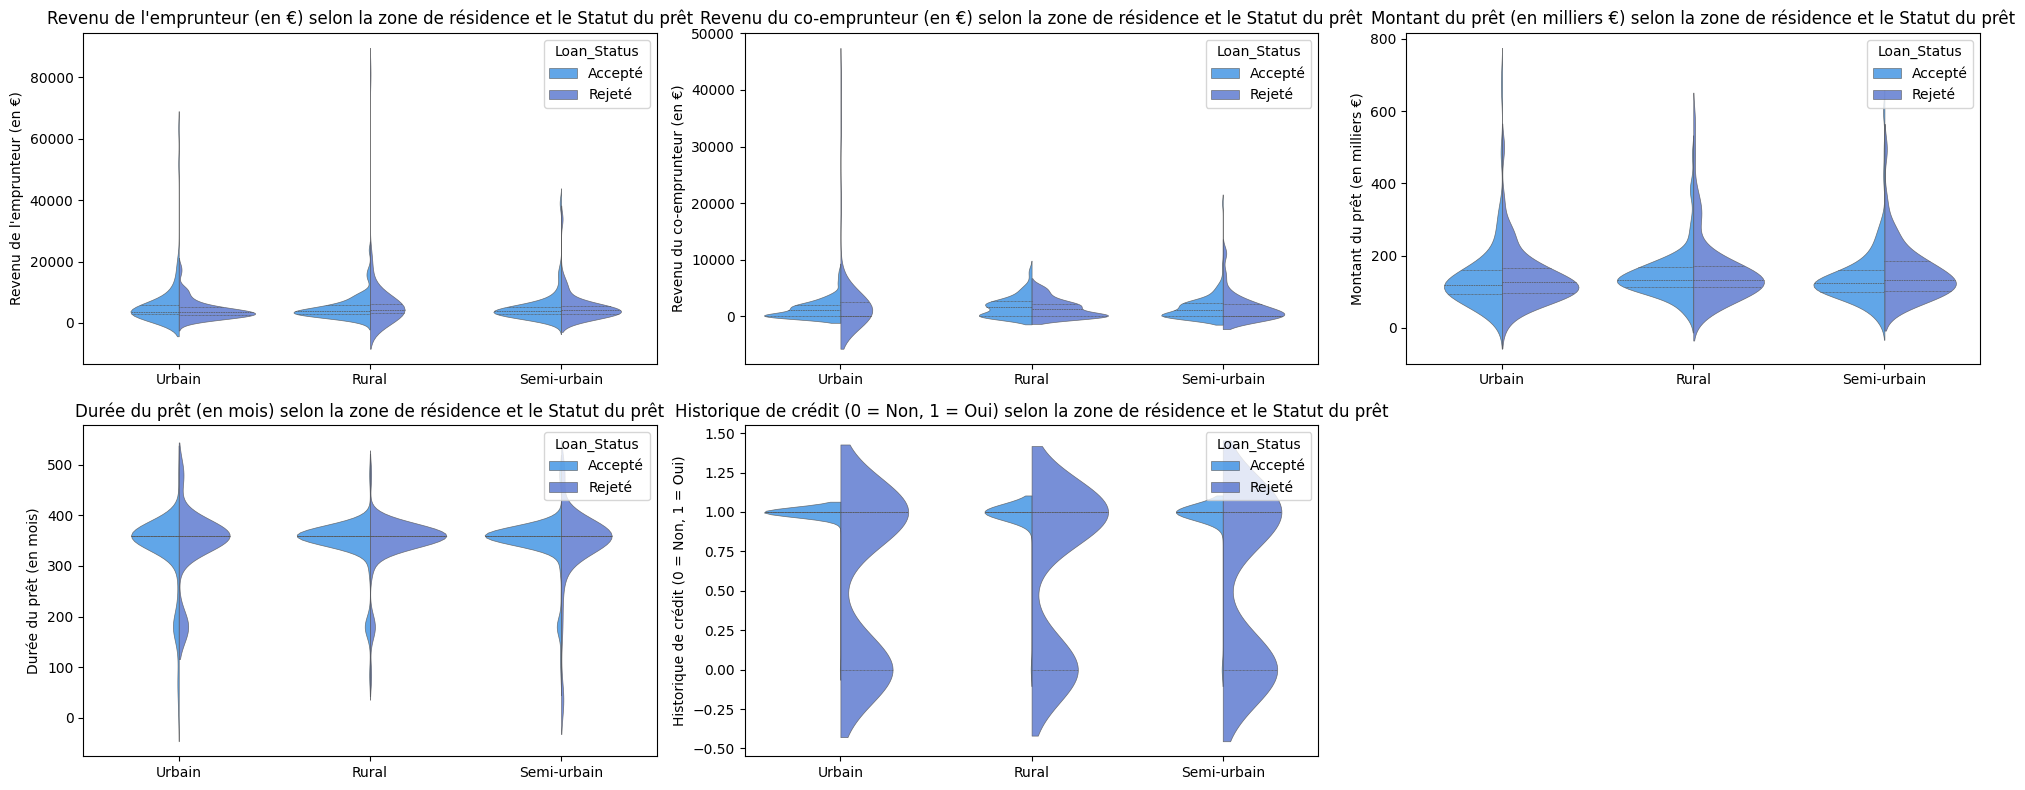

In [940]:
# Interactions entre les variables numériques et variables catégorielles pour relever des tendances
palette_2 = ['#1E90FF', '#4169E1']


plt.figure(figsize=(20, 8))
for i, col in enumerate(features_num, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Property_Area', y=col, hue='Loan_Status', data=df, split=True, palette=palette_2, linewidth=.5, inner='quartile', alpha=.8)
    plt.title(f"{title_map[col] if col in title_map else col} selon {title_feat['Property_Area']} et le {title_feat['Loan_Status']}")
    plt.xlabel('')
    plt.ylabel(title_map[col] if col in title_map else col)
plt.tight_layout()
plt.show()

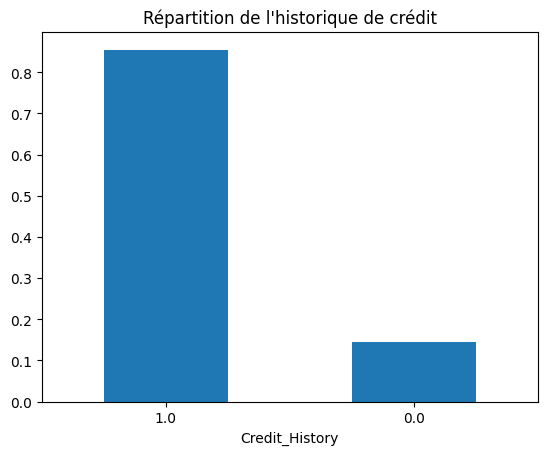

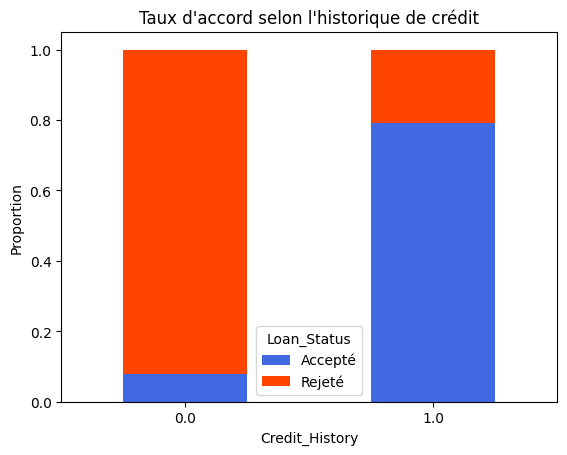

In [941]:
# Pourcentage des crédits accordés et refusés selon l'historique de crédit
credit_history_plot = df['Credit_History'].value_counts(normalize=True).plot(kind='bar', title='Répartition de l\'historique de crédit', rot=0)
plt.show()

# Taux d'accord en fonction de l'historique de crédit
credit_approval = pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index')
credit_approval.plot(kind='bar', stacked=True, color=['royalblue', 'orangered'], title='Taux d\'accord selon l\'historique de crédit', rot=0)
plt.ylabel('Proportion')
plt.show()

# Gestion des valeures numériques

In [942]:
skim(df[features_num])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ApplicantIncome       │   0 │     0 │    5403 │    6109 │  150 │   2878 │  3812 │   5795 │  81000 │   ▇    │  │
│ │ CoapplicantIncome     │   0 │     0 │    1621 │    2926 │    0 │      0 │  1188 │   2297 │  41670 │   ▇    │  │
│ │ LoanAmount            │   0 │     0 │   145.8 │   84.11 │    9 │  100.2 │   128 │  164.8 │    700 │  ▇▇▁   │  │
│ │ Loan_Amount_Term      │   0 │     0 │   342.4 │   64.43 │   12 │    360 │   360 │    360 │    480 │   ▁ ▇  │  │
│ │ Credit_History        │   0 │     0 │   0.855 │  0.3523 │    0 │      1 │     1 │      1 │      1 │ ▁    ▇ │  │
│ └───────────────────────┴─────┴───────┴─────────┴─────────┴──────┴────────┴───────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [943]:
# Sauvegarde de nouveau dataframe numerique
df_numeric = df[features_num]

### Gestion des outliers

In [944]:
df['LoanAmount'].value_counts() 

LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [945]:
# Fonction pour détecter les outliers basés sur la méthode de l'IQR (Interquartile Range)
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Créer une liste pour stocker les outliers
outliers_list = []

# On détecte et affiche les outliers de chaque colonne numérique du dataframe
for col in features_num:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        # print(f"Les outliers de la colonne {col} sont :")
        # print(outliers)
        outliers_list.append(df.loc[outliers.index])

# Concaténer tous les outliers en un seul DataFrame
if outliers_list:
    outliers_df = pd.concat(outliers_list).drop_duplicates()
else:
    outliers_df = pd.DataFrame()

# print("Sous-dataframe des outliers :")
# print(outliers_df)

# Créer un dataframe sans les outliers
df_without_outliers = df.drop(outliers_df.index)
# print("Dataframe sans les outliers :")
# print(df_without_outliers)

# Optionnel : Enregistrer les sous-dataframes pour les analyser plus tard
outliers_df.to_csv('outliers_df.csv', index=False)
df_without_outliers.to_csv('df_without_outliers.csv', index=False)

In [946]:
df_no_outliers = df_without_outliers.select_dtypes(include=['int64', 'float64'])

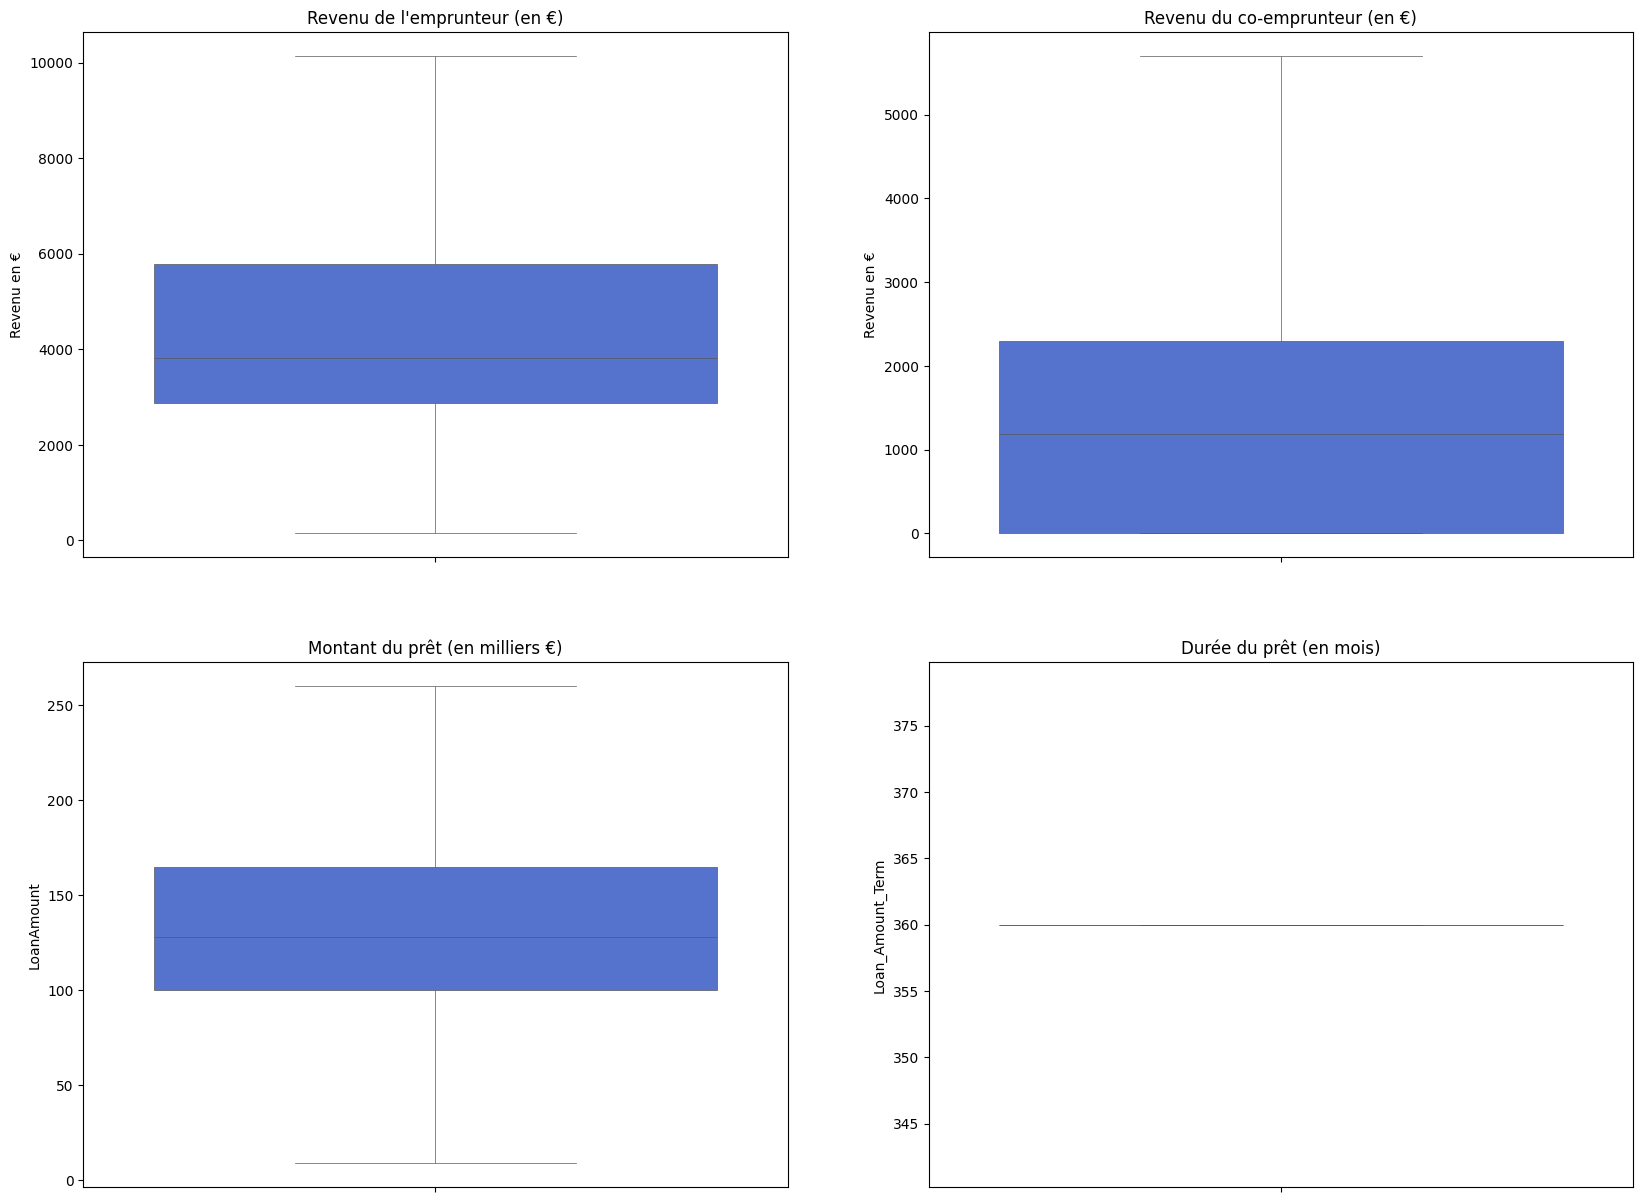

In [947]:
# Distribution des variables numériques après suppression des outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_no_outliers, 1):
    if col != 'Credit_History':
        plt.subplot(2, 2, i)
        sns.boxplot(df[col], showfliers=False, color='royalblue', linewidth=.5)
        plt.title(title_map[col])
        if col != 'Loan_Amount_Term' and col != 'LoanAmount':
            plt.ylabel('Revenu en €') 
        plt.xlabel('')
        
plt.show() 

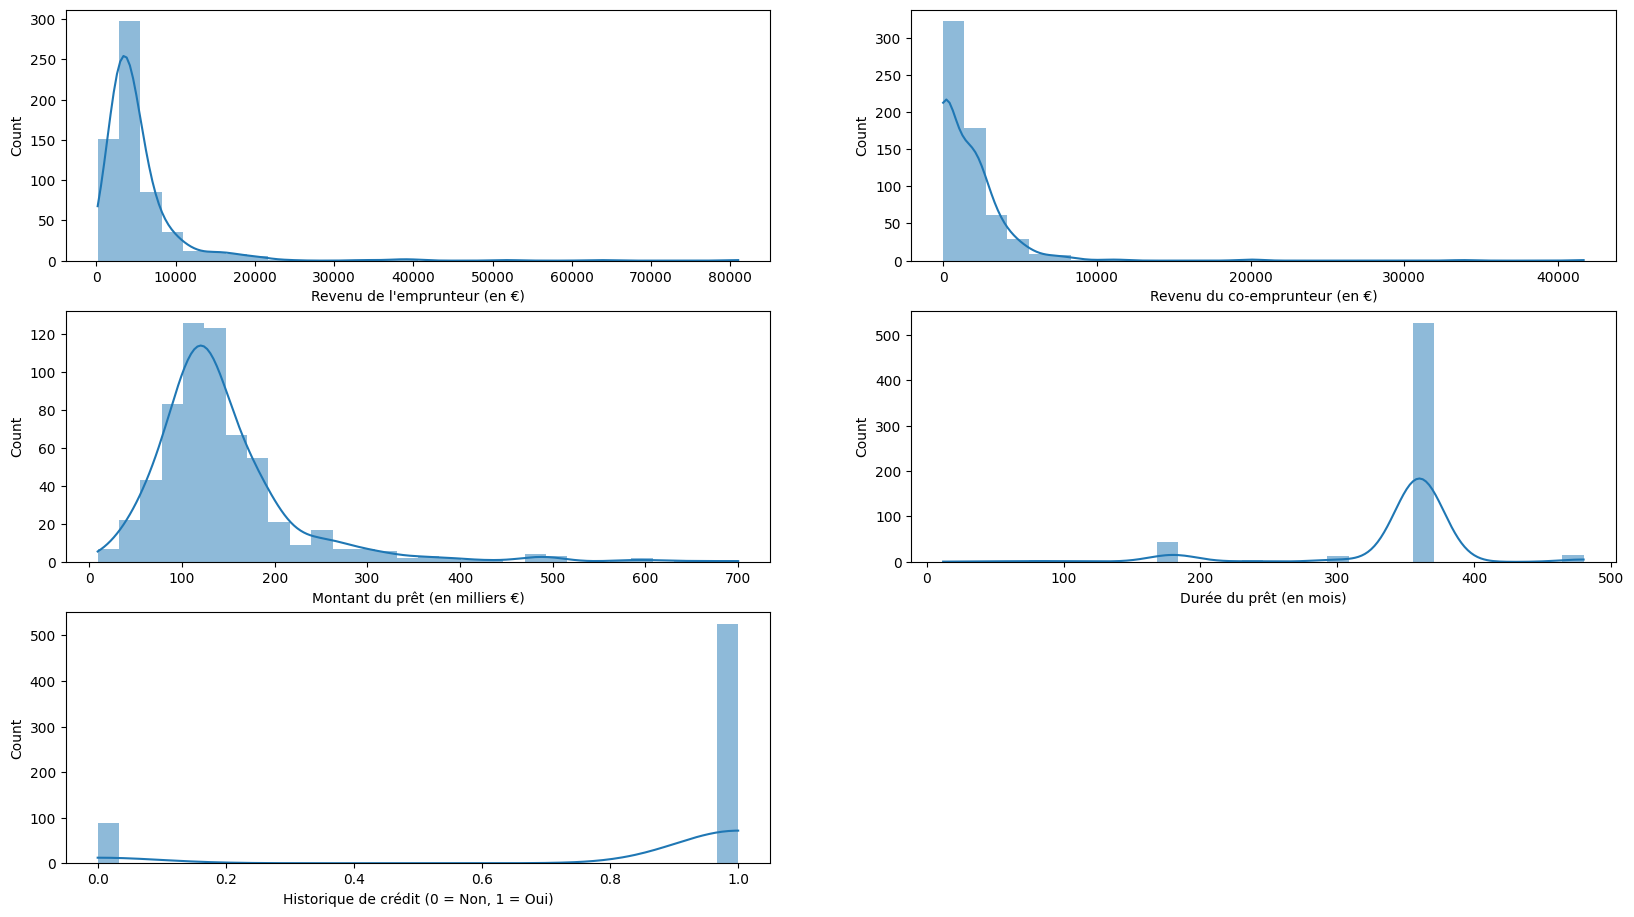

In [948]:
# Distribution des variables numériques après suppression des outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_no_outliers, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=30, edgecolor='none')
    plt.title('')
    plt.xlabel(title_map[col])

In [949]:
# On remplace les valeurs de la variable cible par des valeurs numériques
# df['Gender'] = np.where(df['Gender'] == 'Accepté', 1, 0)